# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [176]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [177]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSML/assessment-1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [179]:
df.shape

(1898, 9)

#### Observations:
Per the shape attribute of the given DataFrame, there are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [180]:
# Use info() to print a concise summary of the DataFrame

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The order_id, customer_id, food_preparation_time and delivery_time columns are all int64. The restaurant_name, cuisine_type, day_of_the_week and rating columns are all object. There's a single float64 column, cost_of_the_order.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [182]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
According to the results from " df.info()", all the columns in the dataframe are listing 1898 non-null entries which is the total number of entries in the dataframe, therefore, there are no null entries in this data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [183]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum preparation time is 20 minutes, the average is about 27.4 minutes and the maximum is 33 minutes.

### **Question 5:** How many orders are not rated?

In [184]:
# Write the code here
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [185]:
df.groupby('rating').count()['order_id'].to_frame()

,order_id
rating,
3,188
4,386
5,588
Not given,736


#### Observations:
There are 736 orders without proper rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Analysing cost of the order:

In [186]:
np.median(df.cost_of_the_order)

14.14

<Axes: xlabel='cost_of_the_order'>

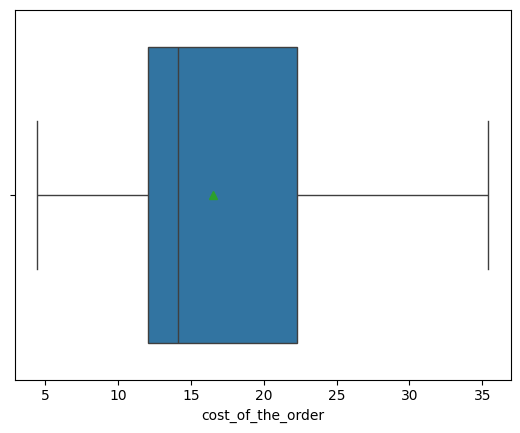

In [187]:
# Write the code here
sns.boxplot(x=df.cost_of_the_order, showmeans=True)

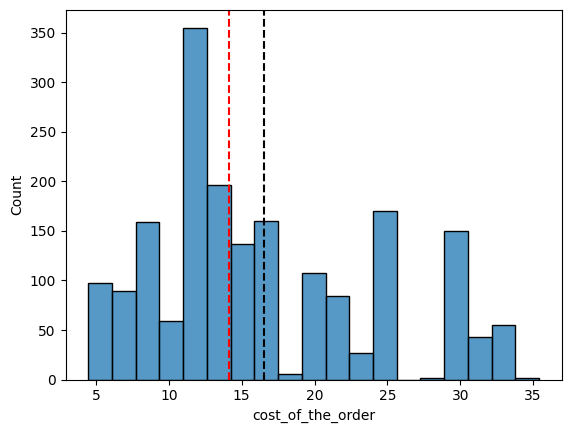

In [188]:
sns.histplot(x=df.cost_of_the_order, kde=False)
plt.axvline(np.mean(df.cost_of_the_order), color="k", linestyle="--")
plt.axvline(np.median(df.cost_of_the_order), color="r", linestyle="--")

#### Observations on cost of the order:
* The distribution doesn't show a high skew.
* Most orders cost between 12 and 22.3 dollars.
* There are no outliars.
* Median is 14.14 and mean is around 16.5, indicating a symmetrical distribution.


#### Analysis on preparation time:

<Axes: xlabel='food_preparation_time'>

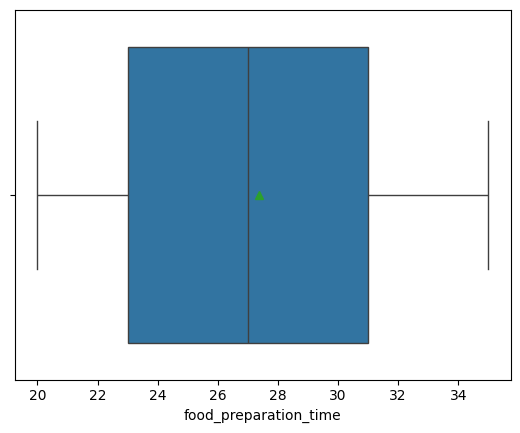

In [189]:
sns.boxplot(x=df.food_preparation_time, showmeans=True)

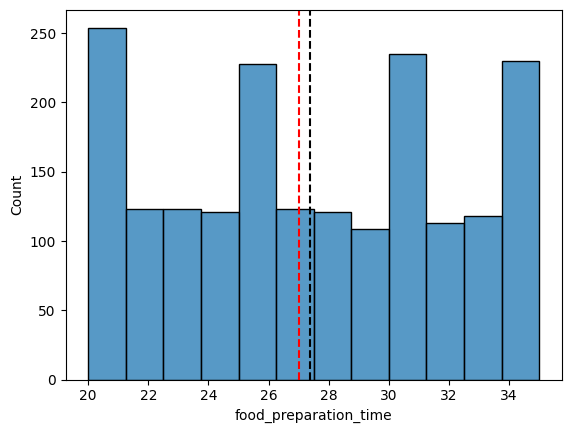

In [190]:
sns.histplot(x=df.food_preparation_time, kde=False)
plt.axvline(np.mean(df.food_preparation_time), color="k", linestyle="--")
plt.axvline(np.median(df.food_preparation_time), color="r", linestyle="--")

<Axes: xlabel='food_preparation_time', ylabel='Density'>

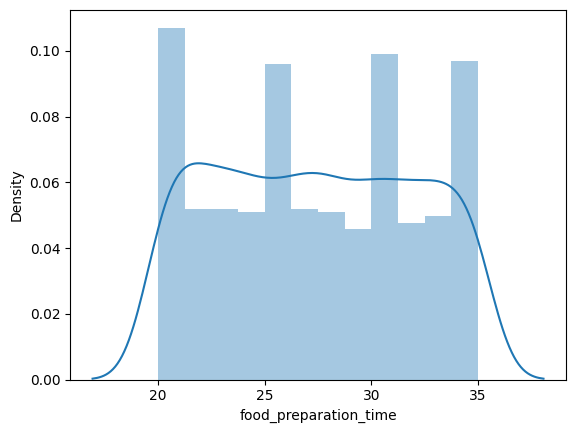

In [191]:
sns.distplot(df.food_preparation_time)

#### Observations on preparation time:
* Distribution doesn't look skewed.
* No outliers.
* Majority of the orders take between 23 and 31 minutes to be prepared.
* Mean and median even closer than seen for cost of order, indicating a symetric distribution too.





#### Analysing delivery time:

<Axes: xlabel='delivery_time'>

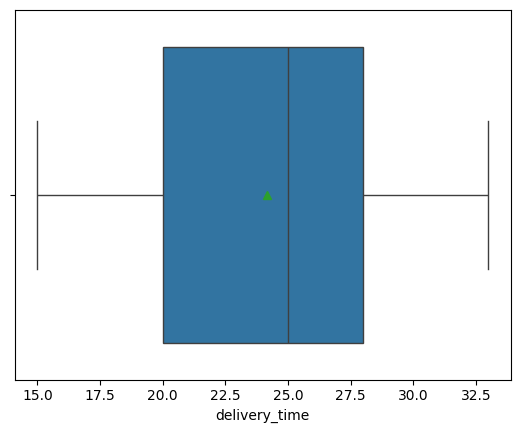

In [192]:
sns.boxplot(x=df.delivery_time, showmeans=True)

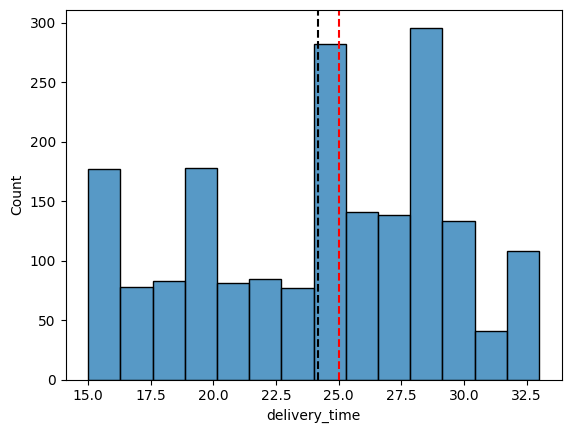

In [193]:
sns.histplot(x=df.delivery_time, kde=False)
plt.axvline(np.mean(df.delivery_time), color="k", linestyle="--")
plt.axvline(np.median(df.delivery_time), color="r", linestyle="--")

<Axes: xlabel='food_preparation_time', ylabel='Density'>

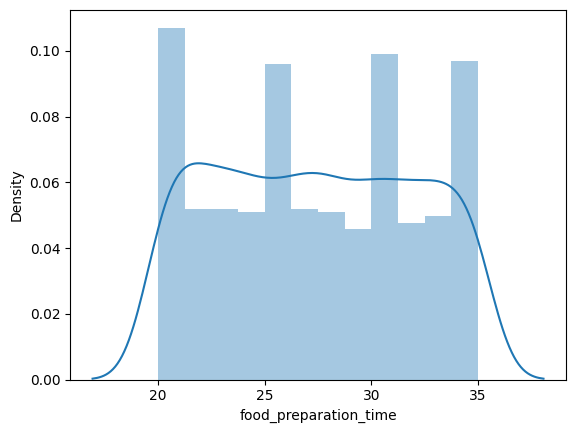

In [194]:
sns.distplot(df.food_preparation_time)

#### Observations on delivery time:
* Distribution doesn't look skewed.
* No outliers.
* Majority of the orders take between 20 and 28 minutes to be delivered.
* Mean and median are also close, indicating a symetric distribution too.

#### Analysing ratings:

In [195]:
df.groupby('rating').count()['order_id'].rename('total')/df.groupby('rating').count()['order_id'].sum()


,total
rating,
3,0.099052
4,0.203372
5,0.309800
Not given,0.387777


<Axes: xlabel='rating', ylabel='count'>

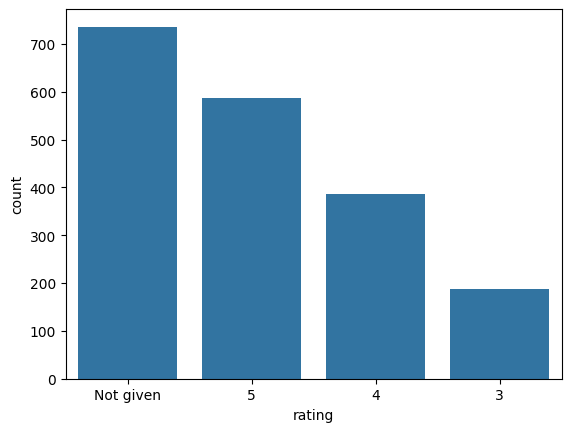

In [196]:

sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)

#### Observations on rating:
* More than 38% of the orders are not rated.
* Around 10% of the order got a rate of 3 (average).
* There were no low ratings and more than 50% of orders got a 4 or 5.

#### Analysing cuisine type:

In [197]:
cuisine_df = df.groupby('cuisine_type').count()['order_id'].rename('total')/df.groupby('cuisine_type').count()['order_id'].sum()
cuisine_df.sort_values(ascending=False)

,total
cuisine_type,
American,0.307692
Japanese,0.247629
Italian,0.157007
Chinese,0.113277
Mexican,0.040569
Indian,0.038462
Middle Eastern,0.025817
Mediterranean,0.024236
Thai,0.010011


<Axes: xlabel='cuisine_type', ylabel='count'>

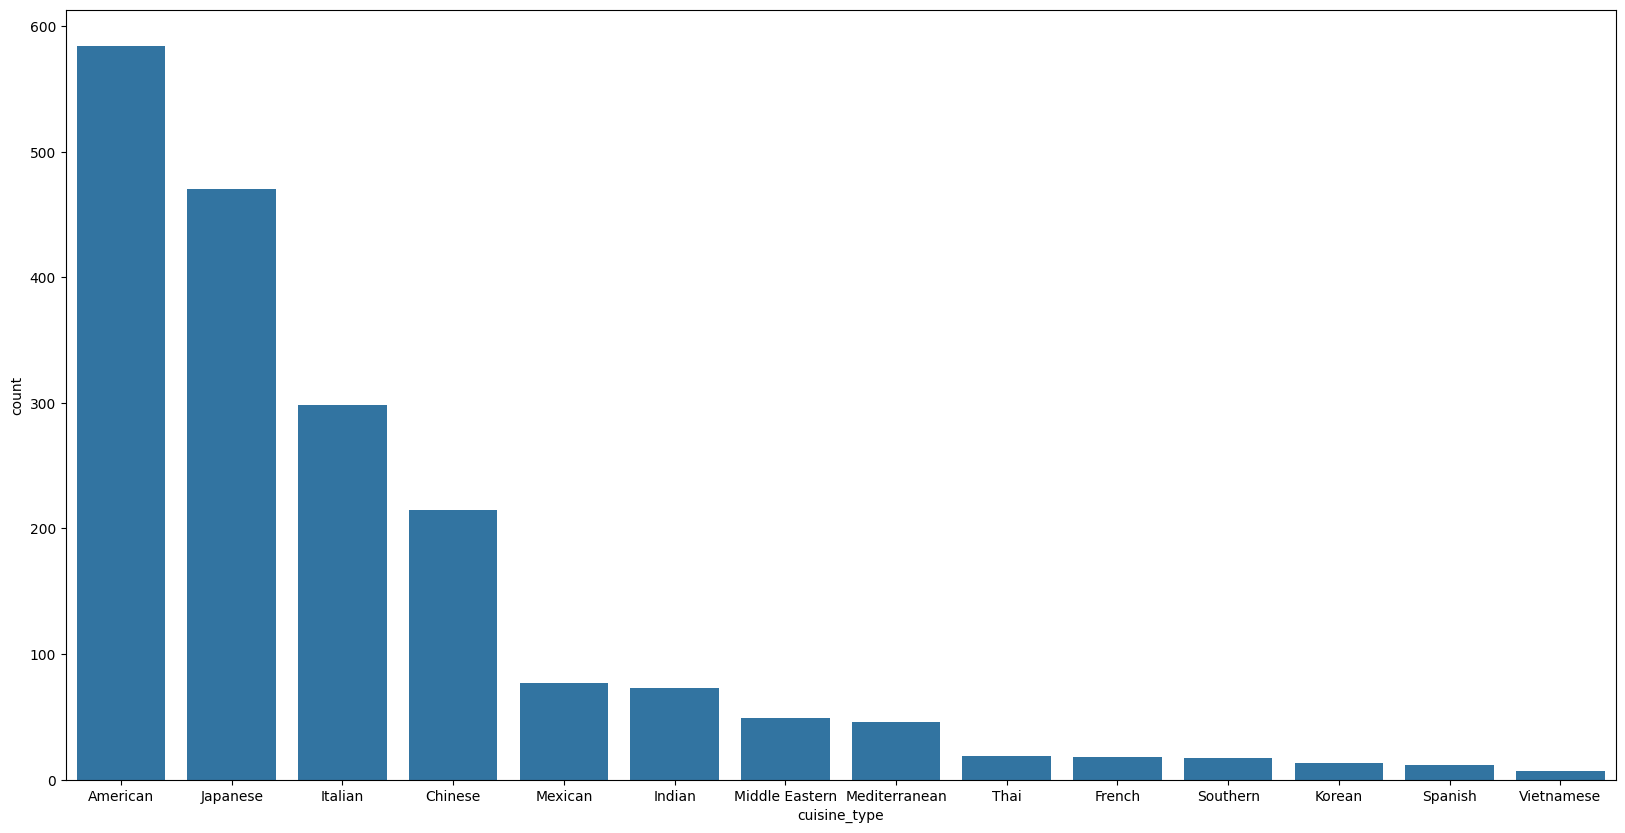

In [198]:
plt.figure(figsize = (20, 10))
sns.countplot(x='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)


#### Observations on cuisine:
* Four types (American, Japanese, Italian and Chinese) dominate the distribution, with more than 80% of the orders falling in one of these categories.
* American and Japanese type alone are in more than 50% of the orders.

#### Analysing day of the week:

In [200]:
df.groupby('day_of_the_week').count()['order_id'].rename('total')/df.groupby('day_of_the_week').count()['order_id'].sum()

,total
day_of_the_week,
Weekday,0.288198
Weekend,0.711802


<Axes: xlabel='day_of_the_week', ylabel='count'>

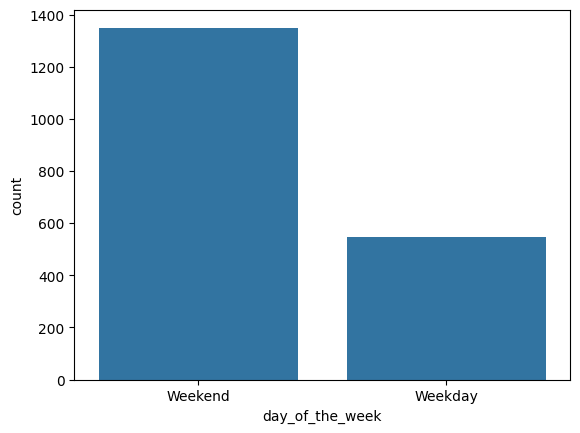

In [201]:
sns.countplot(x='day_of_the_week', data=df, order=df['day_of_the_week'].value_counts().index)

#### Observations on day of the week:
* More than 70% of orders are on weekends.

Analysing customer consuming:

In [202]:
cust_order_df = df.groupby('customer_id').count()['order_id'].rename('total orders')


In [203]:
cust_order_spent = df.groupby('customer_id').sum()['cost_of_the_order'].rename('total spent')

Let's check the overal stats for the two series generated above:

In [204]:
cust_order_df.describe().T

,total orders
count,1200.000000
mean,1.581667
std,1.090560
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,13.000000


In [205]:
cust_order_spent.describe().T

,total spent
count,1200.000000
mean,26.095683
std,20.796383
min,4.750000
25%,12.660000
50%,20.695000
75%,31.430000
max,225.800000


<Axes: xlabel='total orders'>

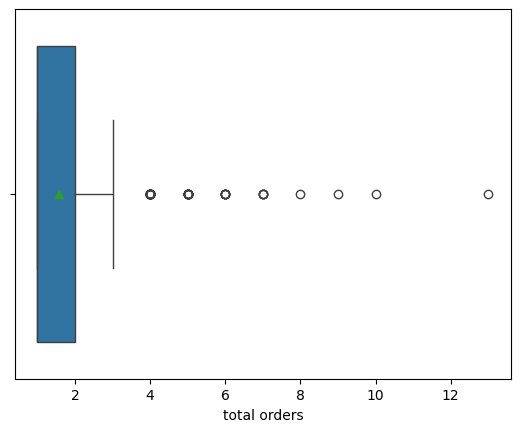

In [206]:
sns.boxplot(x=cust_order_df, showmeans=True)

The chart above shows that customers with more than 3 orders are outliers. Let's count how many outliers we have:

In [207]:
np.median(cust_order_df)

1.0

In [208]:
#Count rows where total orders are greater than two STDs from the median
cust_order_df.where(cust_order_df>3).sort_values(ascending=False).dropna()

,total orders
customer_id,
52832,13.0
47440,10.0
83287,9.0
250494,8.0
276192,7.0
...,...
141732,4.0
142356,4.0
146588,4.0


<Axes: xlabel='total spent'>

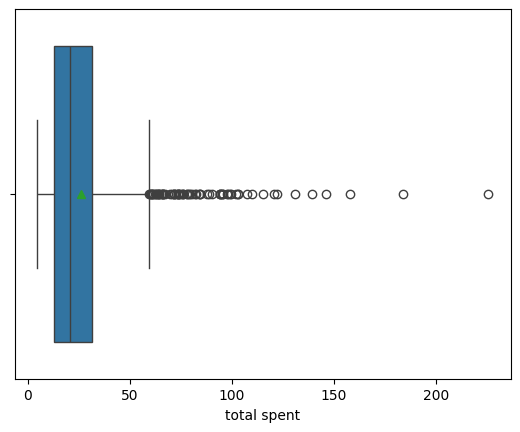

In [209]:
sns.boxplot(x=cust_order_spent, showmeans=True)

The number of outliers when we consider customer spending is even higher:

In [210]:
np.median(cust_order_spent)

20.695

In [211]:
#Count rows where total spent is greater than two STD from the median
cust_order_spent.where(cust_order_spent>60).sort_values(ascending=False).dropna()

,total spent
customer_id,
52832,225.80
250494,183.83
47440,158.18
276192,146.46
83287,139.31
...,...
68551,61.26
128600,60.69
96877,60.54


<Axes: xlabel='total spent', ylabel='Density'>

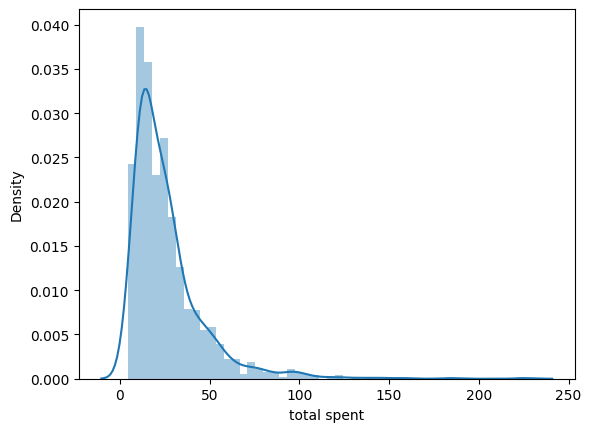

In [212]:
sns.distplot(cust_order_spent)

<Axes: ylabel='Frequency'>

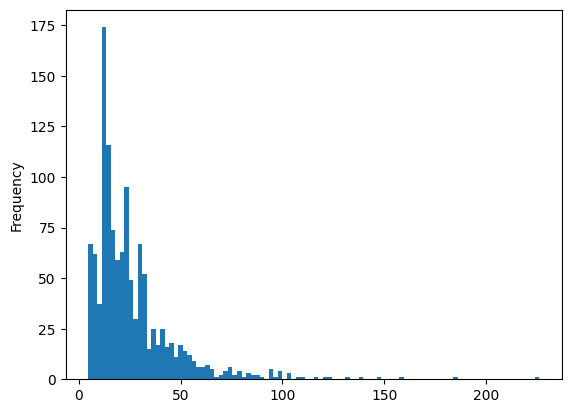

In [213]:
cust_order_spent.plot.hist(bins=100)

The charts confirm that most of customer spendings is between 20 and 20 dollars.

#### Observations on customer consuming:
* There are 66 customers who are outliers in the number of orders.
* There are 70 outliers when we check the total spent by individual customers.
* There are total of 1200 different customers in this distribution.
* Most customers have 1 or 2 orders only.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [214]:
# Write the code here
df['restaurant_name'].value_counts().head(10)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


#### Observations:
The top 5 restaurants by number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends?

In [215]:
# Write the code here
df.where(df.day_of_the_week=='Weekend').groupby('cuisine_type')['order_id'].count().sort_values( ascending=False)

,order_id
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
American is the most popular cuisine type on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [219]:
# Write the code here
above_twenty = df.where(df.cost_of_the_order > 20.0).order_id.count()/len(df['cost_of_the_order'])
above_twenty

0.2924130663856691

#### Observations:
Around 29.2% of the orders are over 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [220]:
# Write the code here
df.delivery_time.describe()

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


#### Observations:
The mean delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [221]:
df['customer_id'].value_counts().head(10)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
82041,7
65009,7
276192,7
97079,6


#### Observations:
The ids of the most frequent customers are: 52832, 47440 and 83287. The number of orders placed by each of these customers are, respectively, 13, 10 and 9.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

Let's start by checking potential correlation between the numeric values in this data frame:

<Axes: >

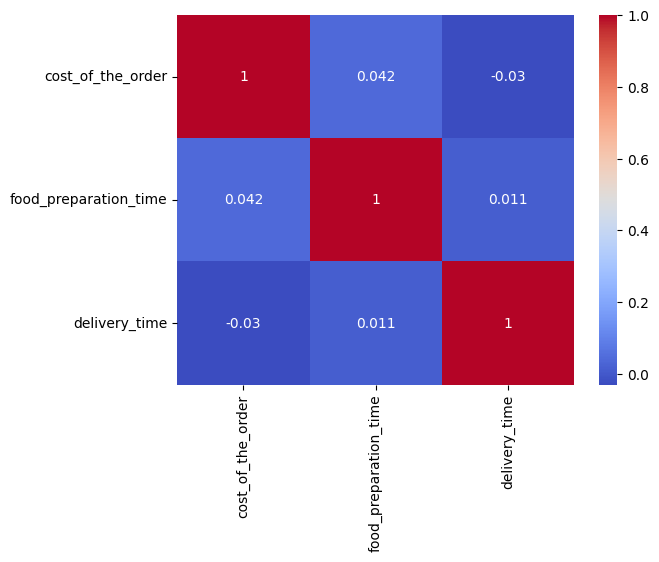

In [222]:
numerics = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[numerics].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        xticklabels = corr.columns,
        yticklabels = corr.columns)

There doesn't seem to be any correlation bewteen cost of the order and the related preparation and delivery times.

Let's check the average cost of order per cuisine type:

<Axes: xlabel='cuisine_type'>

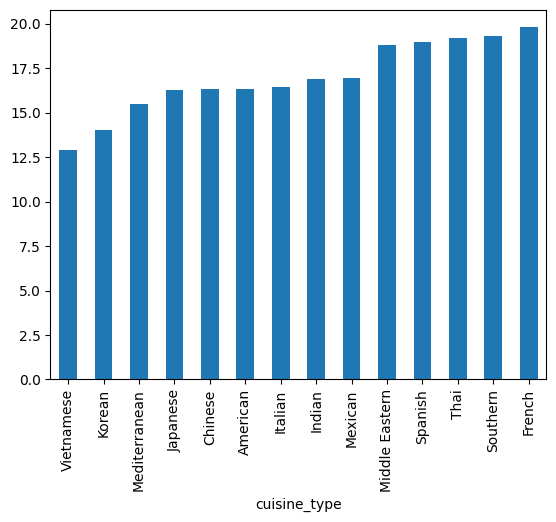

In [223]:
df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values().plot(kind='bar', x='cuisine_type')

There four cuisine types where average cost is larger than the rest: Middle Eastern, Spanish, Thai, Southern and French.

Let's analyse the same variables above with a box plot:

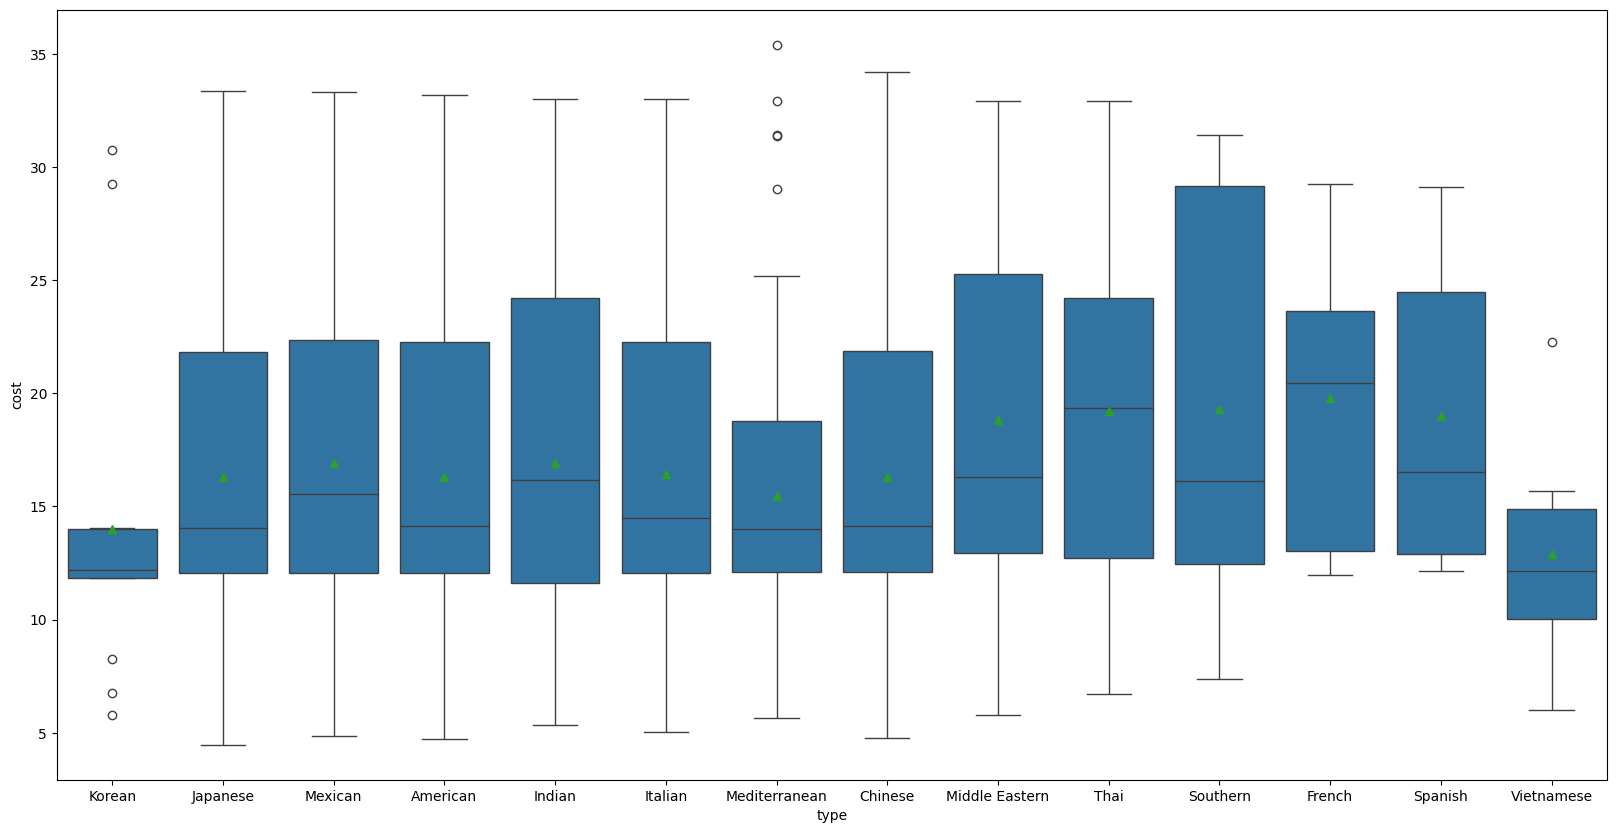

In [224]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, showmeans=True)
plt.ylabel('cost')
plt.xlabel('type')
plt.show()



*   Korean and Mediterranean means seem influenced by the outliars
*   Indian, Thai and French look quite symetric
*   Spanish, Southern, Middle Eastern and Chinese look a bit positively skewed.

Lets plot the median for these two variables and check the correlation between cost and cuisine type:




<Axes: xlabel='cuisine_type'>

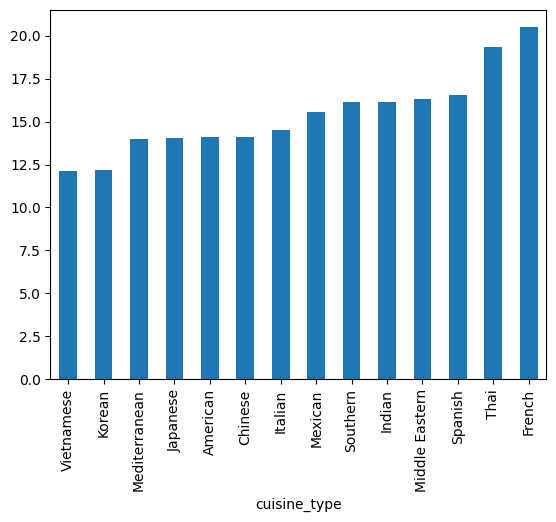

In [225]:
df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values().plot(kind='bar', x='cuisine_type')

It looks like French and Thai are the most expensive, followed by Spanish, Middle Eastern, Indian and Southern.


Let's analyse cost with day of the week:

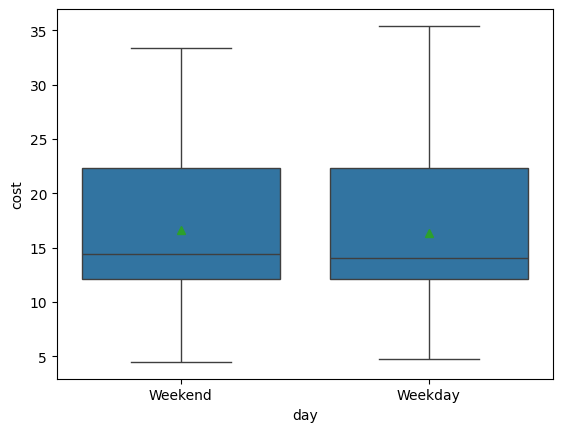

In [226]:
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df, showmeans=True)
plt.ylabel('cost')
plt.xlabel('day')
plt.show()

No apparent difference between weekends or weekdays, related to cost.

Let's check cost against ratings:

<Axes: xlabel='rating'>

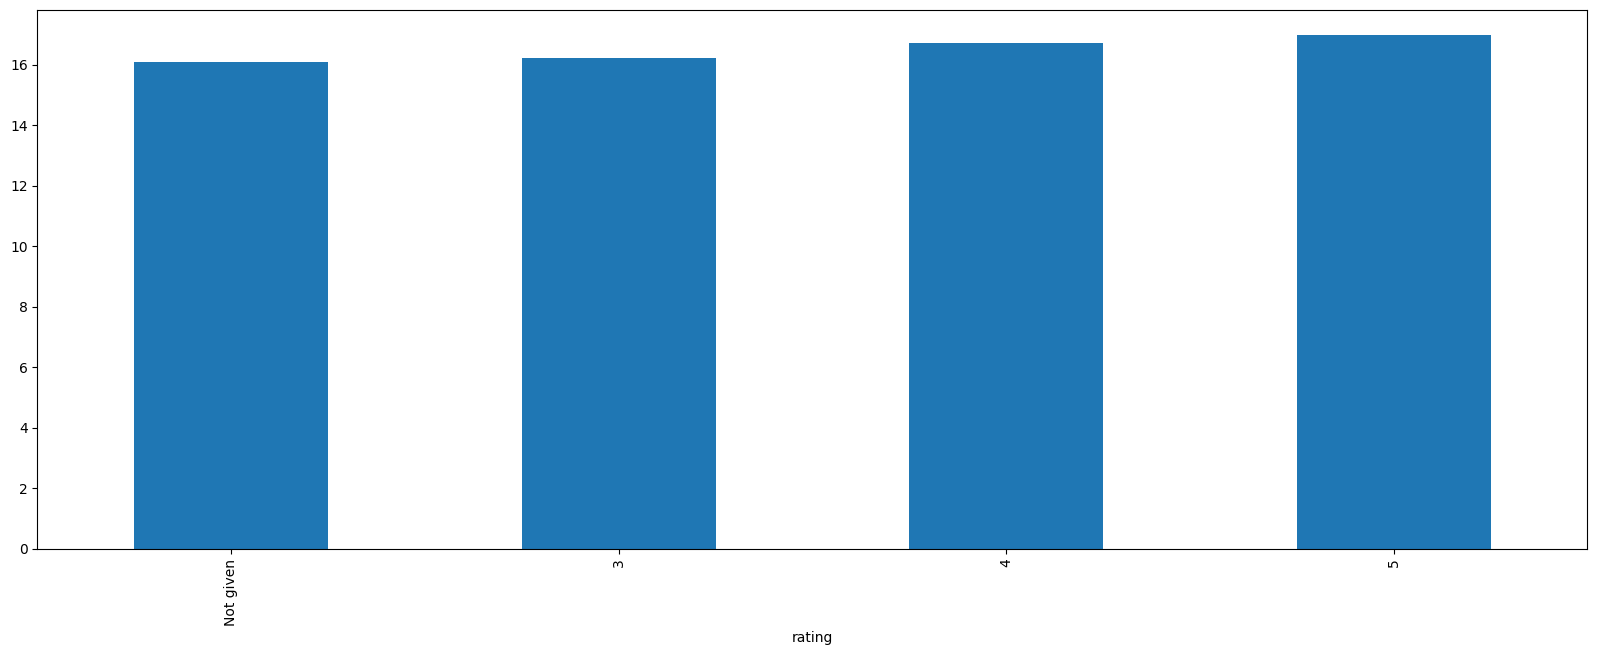

In [227]:
plt.figure(figsize = (20, 7))

df.groupby('rating')['cost_of_the_order'].mean().sort_values().plot(kind='bar', x='rating')

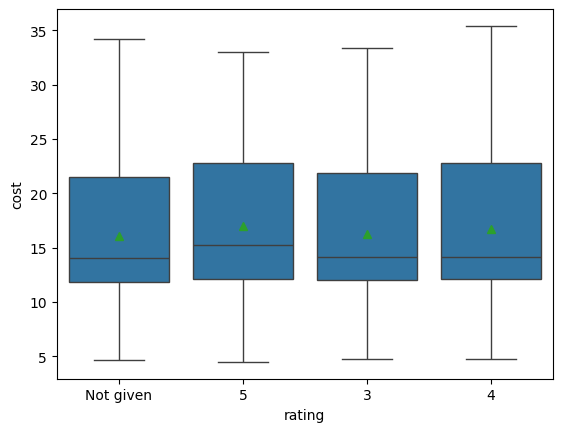

In [228]:
sns.boxplot(x='rating', y='cost_of_the_order', data=df, showmeans=True)
plt.ylabel('cost')
plt.xlabel('rating')
plt.show()

No clear difference between cost and the ratings.

Let's double check if ratings correlate to cost of order using a heatmap, by converting it into a new column where ratings are ints. Since we know there are now 0 valued ratings, lets convert 'Not given' to 0.

In [229]:
#Let's check if ratings correlate to cost of order, by converting it into a new column where ratings are ints
#Since we know there are now 0 valued ratings, lets convert 'Not given' to 0
df['rating_int'] = df.rating.replace(to_replace='Not given', value='0').astype('int')

<Axes: >

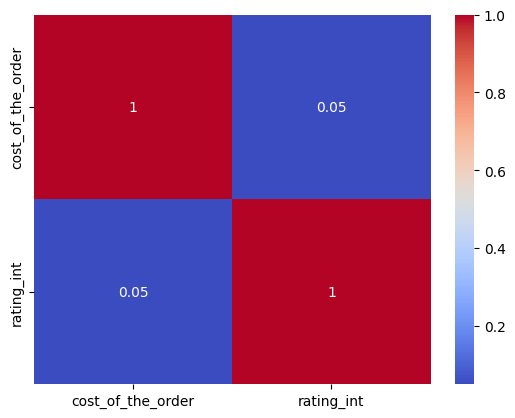

In [230]:
corr = df[['cost_of_the_order','rating_int']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        xticklabels = corr.columns,
        yticklabels = corr.columns)

It doesn't seem to exist a correlation between ratings and cost.

Let's calculate the mean cost for each restaurant and print it within its type.

In [231]:
df.groupby(by=['restaurant_name', 'cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False).head(10)

,,cost_of_the_order
restaurant_name,cuisine_type,
Kambi Ramen House,Japanese,32.930000
Emporio,Italian,31.430000
Bhatti Indian Grill,Indian,31.115000
Haru Gramercy Park,Japanese,29.830000
Il Bambino,Italian,29.250000
Lucky Strike,American,29.250000
Sarabeth's,American,29.133333
Rohm Thai,Thai,29.100000
Klong,Thai,29.050000


Could there be a difference in cost of order between weekdays and weekend?

In [232]:
df.groupby('day_of_the_week')['cost_of_the_order'].mean()

,cost_of_the_order
day_of_the_week,
Weekday,16.311188
Weekend,16.574833


On average, it doesn't look that cost of order varies much, between weekdays and weekends.

Let's check delivery time against day of the week:

In [233]:
delivery_by_day_series = df.groupby('day_of_the_week')['delivery_time'].mean()
delivery_by_day_series

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [234]:
(delivery_by_day_series['Weekday'] - delivery_by_day_series['Weekend'])/delivery_by_day_series['Weekend']

0.2612375859508293

It seems average delivery times are 26% higher on weekdays. Let's chek if there's a similar trend for the preparation time:

In [235]:
df.groupby('day_of_the_week')['food_preparation_time'].mean()

,food_preparation_time
day_of_the_week,
Weekday,27.212066
Weekend,27.436714


Food preparation time doesn't show same deviation as delivery time, when comparing averages for weekdays against weekend days.

Let's check the average preparation time for each cuisine type:

In [236]:
df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False)

,food_preparation_time
cuisine_type,
Southern,27.588235
Chinese,27.511628
Japanese,27.510638
Italian,27.483221
American,27.440068
Thai,27.315789
Indian,27.109589
Mediterranean,27.000000
Spanish,26.916667


Average preparation time doesn't vary much between cuisine types.

Let's calculate and plot a bar graph of the percentage of orders that got rated, for each cuisine type:

In [237]:
rated_df = df.where(df.rating_int > 0).dropna()
cuisine_rate_percent_series = (rated_df['cuisine_type'].value_counts()/df['cuisine_type'].value_counts()).sort_values(ascending=False)
cuisine_rate_percent_series

,count
cuisine_type,
Southern,0.764706
Vietnamese,0.714286
Mediterranean,0.695652
Middle Eastern,0.693878
Korean,0.692308
Indian,0.684932
American,0.630137
Mexican,0.623377
Chinese,0.618605


<Axes: xlabel='cuisine_type'>

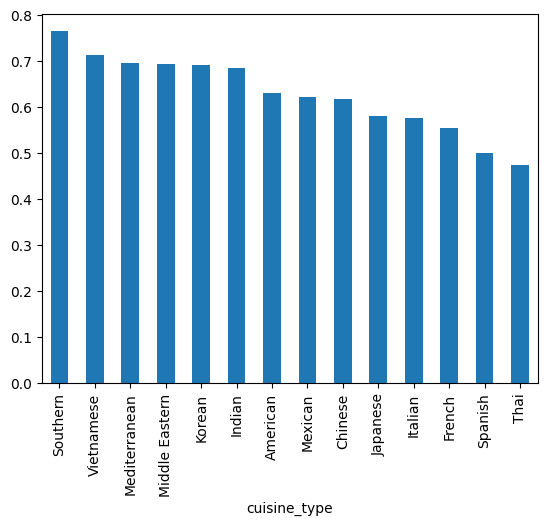

In [238]:
cuisine_rate_percent_series.plot(kind='bar', x='cuisine_type')

In [239]:
len(rated_df)/len(df)

0.6122233930453108

The percentage of orders getting rated is around 61%. Five cuisine types are below this, in number of ratings, including the two most profitable, French and Thai.

Let's check the average rate per cuisine:

In [240]:
rates_by_cuisine_series = rated_df.groupby('cuisine_type')['rating_int'].mean().sort_values(ascending=False)
rates_by_cuisine_series

,rating_int
cuisine_type,
Spanish,4.833333
Thai,4.666667
Indian,4.540000
Mexican,4.416667
Japanese,4.373626
Italian,4.360465
Chinese,4.338346
Southern,4.307692
French,4.300000


<Axes: xlabel='cuisine_type'>

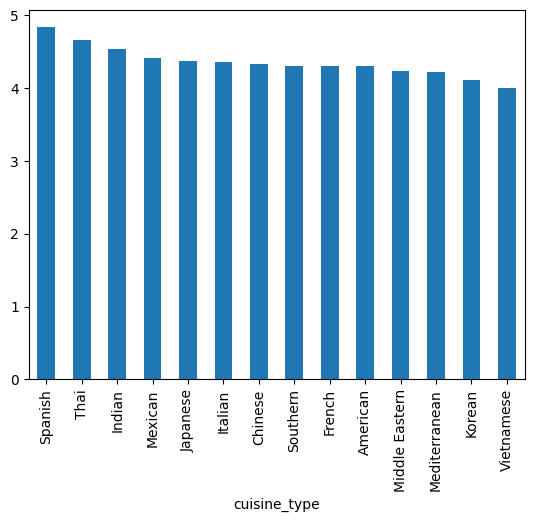

In [241]:
rates_by_cuisine_series.plot  (kind='bar', x='cuisine_type')

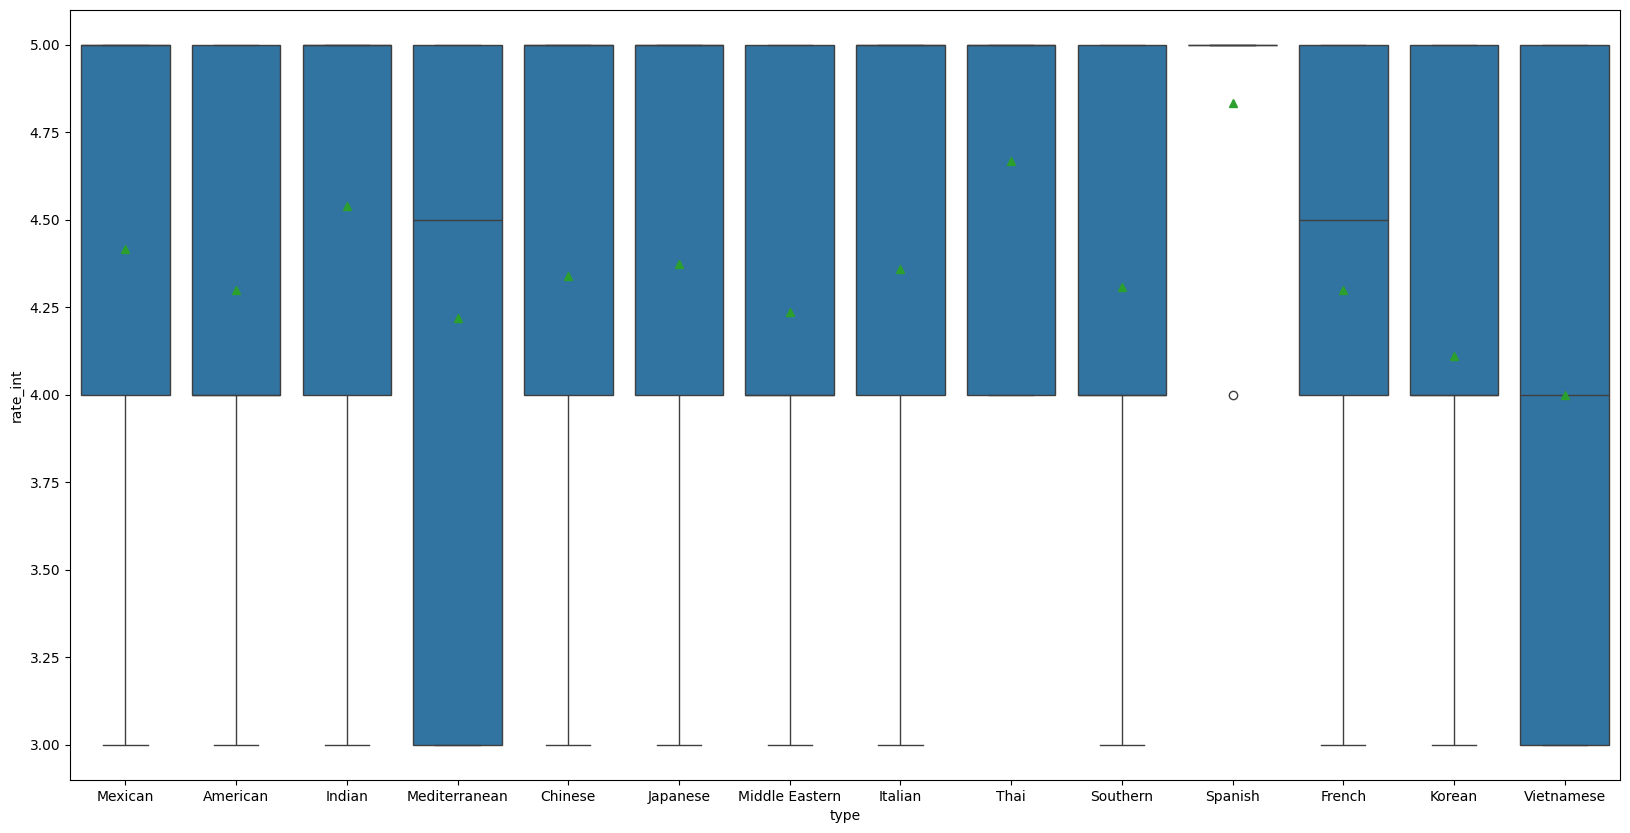

In [242]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='cuisine_type', y='rating_int', data=rated_df, showmeans=True)
plt.ylabel('rate_int')
plt.xlabel('type')
plt.show()

Per the boxplot, rating values are not properly distributed.

Finally, let's calculate the percentage of orders for each cuisine type:

In [243]:
df.groupby('cuisine_type')['order_id'].count().apply(lambda x: x/len(df)).sort_values(ascending=False)

,order_id
cuisine_type,
American,0.307692
Japanese,0.247629
Italian,0.157007
Chinese,0.113277
Mexican,0.040569
Indian,0.038462
Middle Eastern,0.025817
Mediterranean,0.024236
Thai,0.010011


#### Observations on multivariate analysys:

* French, Spanish, Southern, Thai and Middle Eastern, are on average, the most expensive. When we analysed cost by cuisine type with boxplot, the Spanish, Southern and Middle Eastern looked a bit skewed. Comparing the medians revealed that French and Thai are the top most expensive.
* When analysing invidual restaurants, the top 3 individual restaurants, on average, were Japanese, Italian and Indian.
* Korean is highly skewed, bringing its mean up.
* The average cost for orders rated 4 and 5 is slightly larger than those rated 3 or not rated.
* The average cost order is similar between weekdays and weekends.
* Rating and cost of the order doesn't seem to correlate.
* There doesn't seem to be any correlation between cost of the order and the related preparation and delivery times.
* Food preparation time varies little between cuisine types and between weekdays and weekends.
* Average delivery time is 26% higher on weekdays.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [244]:
# Write the code here
rated_df = df.where(df.rating_int > 0).dropna()

In [245]:
restaurants_df = pd.DataFrame(data=rated_df.groupby('restaurant_name').count()['rating_int'].rename('total'), index=rated_df.restaurant_name.unique())

In [246]:
restaurants_df['rating_mean'] = rated_df.groupby('restaurant_name')['rating_int'].mean()

In [247]:
#Thought about add the cuisine type as well, for extra insights
restaurants_df['type'] = rated_df.groupby('restaurant_name')['cuisine_type'].unique()

In [248]:
restaurants_df.where(restaurants_df.total > 50).dropna()

,total,rating_mean,type
Blue Ribbon Fried Chicken,64.0,4.328125,[American]
Shake Shack,133.0,4.278195,[American]
Blue Ribbon Sushi,73.0,4.219178,[Japanese]
The Meatball Shop,84.0,4.511905,"[Italian, American]"


In [249]:
#It came as a surprise that one restaurant name was listed as more than one type on different records
restaurants_df[restaurants_df['type'].apply(lambda x: len(x) > 1)]

,total,rating_mean,type
The Meatball Shop,84,4.511905,"[Italian, American]"


#### Observations:
The restaurants with more than 50 ratings and with a mean greater than 4 are: Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi and The Meatball Shop.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [250]:
# Write the code here
df['revenue'] = df['cost_of_the_order'].apply(lambda x: x*0.25 if x > 20 else x*0.15)

In [251]:
df.revenue.sum()

6172.714

#### Observations:
The revenue accross all orders was 6,172.71 dollars.

**Some extra insights about revenue:**

Calculate the average revenue for each cuisine type:

In [252]:
df.groupby('cuisine_type')['revenue'].mean().sort_values(ascending=False)

,revenue
cuisine_type,
French,4.232917
Thai,4.108026
Southern,4.044324
Middle Eastern,3.950071
Spanish,3.936375
Indian,3.383479
Mexican,3.343123
Italian,3.244579
American,3.219885


Bar plot of the average revenues for each cuisine type:



<Axes: xlabel='cuisine_type'>

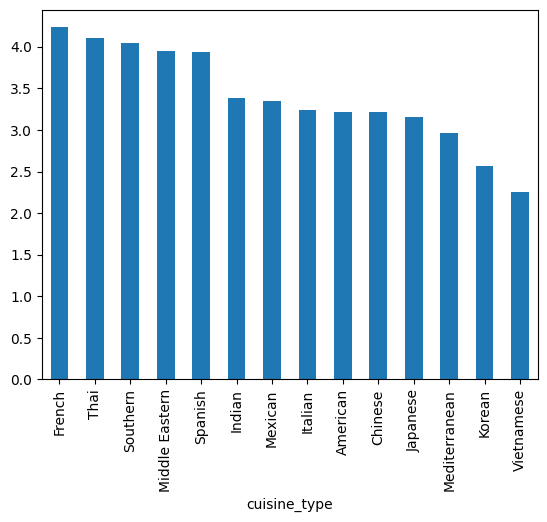

In [253]:
df.groupby('cuisine_type')['revenue'].mean().sort_values(ascending=False).plot(kind='bar', x='cuisine_type')

We've seen that cost by cuisine can be skewed. Let's check revenue by type with boxplot:

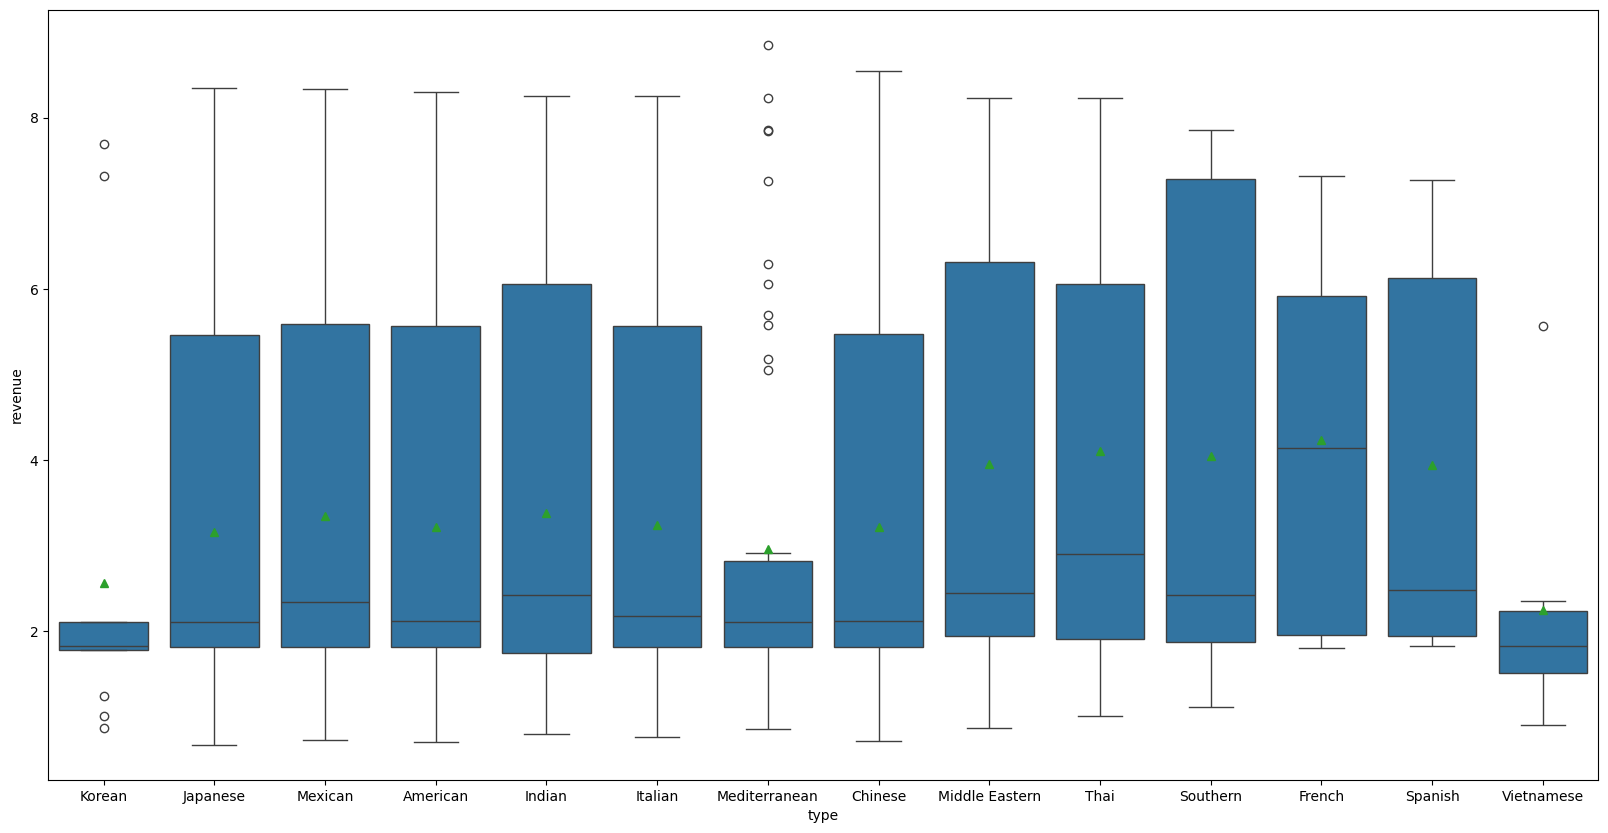

In [254]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='cuisine_type', y='revenue', data=df, showmeans=True)
plt.ylabel('revenue')
plt.xlabel('type')
plt.show()

All, apart from French looking skewed. Let's plot the revenue medians:

<Axes: xlabel='cuisine_type'>

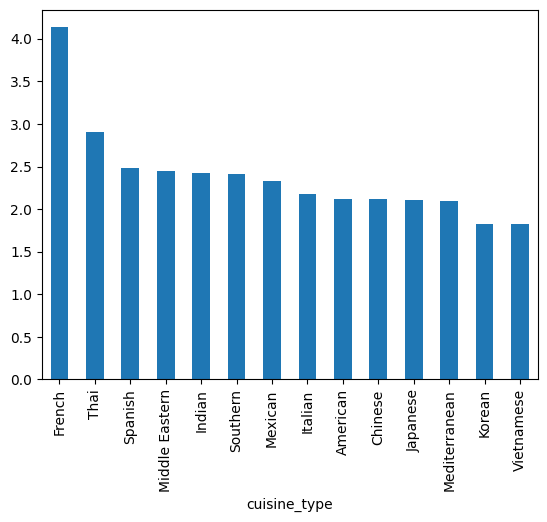

In [255]:
df.groupby('cuisine_type')['revenue'].median().sort_values(ascending=False).plot(kind='bar', x='cuisine_type')

French looks the revenue "winner".

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [256]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.where(df.total_time > 60).count().order_id/df.count().order_id


0.1053740779768177

#### Observations:
Around 10.5% of the orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [257]:
# Write the code here
day_series = df.groupby('day_of_the_week')['delivery_time'].mean()
day_series

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [258]:
df.groupby('day_of_the_week')['total_time'].mean()

,total_time
day_of_the_week,
Weekday,55.552102
Weekend,49.906736


In [259]:
day_series['Weekday'] - day_series['Weekend']

5.870014357297798

In [262]:
(day_series['Weekday'] - day_series['Weekend'])/day_series['Weekend']

0.2612375859508293

#### Observations:
On average, the delivery time is 5.87 minutes longer on week days (26.1% higher), than on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* French and Thai are the most profitable, yet it only accounts to 1% of the orders, each.
* Delivery times during week days is higher than during weekends.
* Only 61% of the orders are rated.
* Among the rated orders, all cuisines rated, on average, 4 or more. Spanish is the highest rated. However, the low number of ratings reflect the poor distribution of rating values.

### Recommendations:

* Given French and Thai are the most profitable, focus on promoting restaurants from these cuisine types more to customers. Could these restaurants be recommended more often in the app/UI? Can the business target new deals with restaurants of these types?
* Investigate why customer reviews are low. Is it an issue with the UI? Maybe implement marketing campains to promote customer reviews.
* Analyse further why delivery time is higher in weekdays. Most of the orders in the sample were on weekends, so it doesn't seem to be that demand is higher in weekdays. Maybe more drivers should be recruited for weekdays?

---